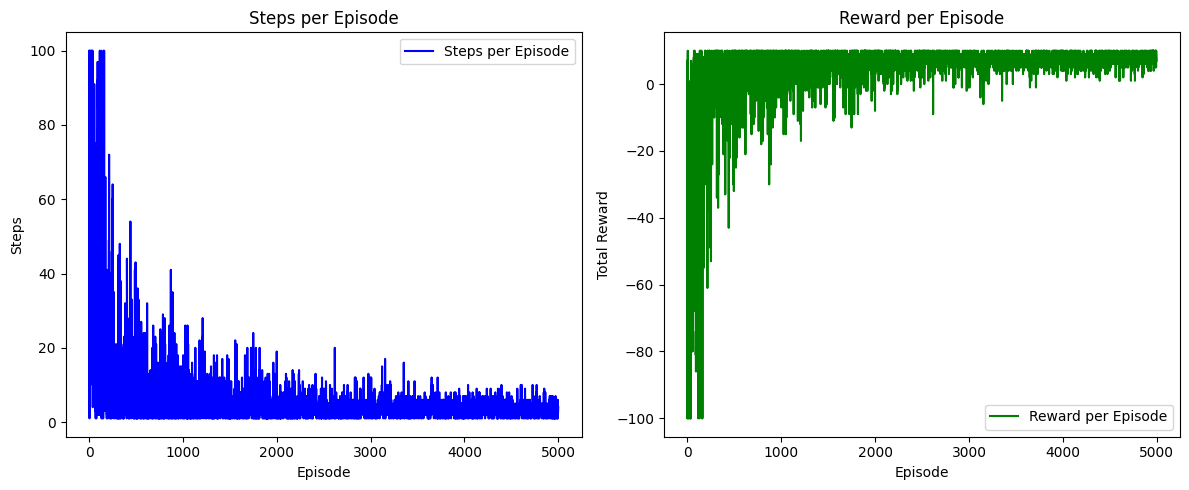

Success rate: 100.00%


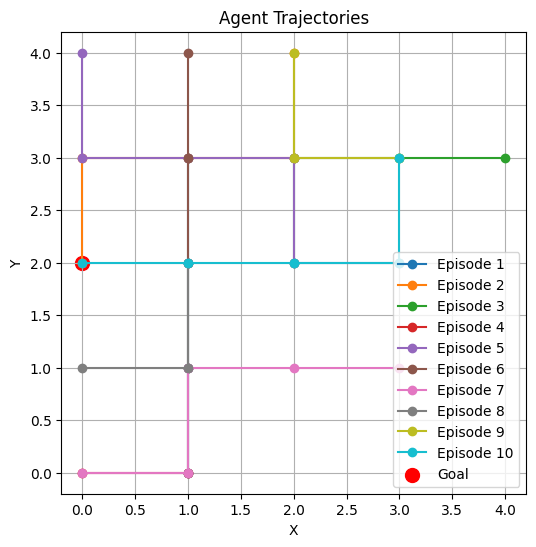

Learned Policy (Best Action per State-Goal Pair):
State ((0, 0), (0, 0)): Action 0
State ((0, 0), (0, 1)): Action 3
State ((0, 0), (0, 2)): Action 3
State ((0, 0), (0, 3)): Action 3
State ((0, 0), (0, 4)): Action 3
State ((0, 0), (1, 0)): Action 1
State ((0, 0), (1, 1)): Action 3
State ((0, 0), (1, 2)): Action 3
State ((0, 0), (1, 3)): Action 1
State ((0, 0), (1, 4)): Action 1
State ((0, 0), (2, 0)): Action 1
State ((0, 0), (2, 1)): Action 1
State ((0, 0), (2, 2)): Action 3
State ((0, 0), (2, 3)): Action 1
State ((0, 0), (2, 4)): Action 3
State ((0, 0), (3, 0)): Action 1
State ((0, 0), (3, 1)): Action 1
State ((0, 0), (3, 2)): Action 3
State ((0, 0), (3, 3)): Action 3
State ((0, 0), (3, 4)): Action 2
State ((0, 0), (4, 0)): Action 1
State ((0, 0), (4, 1)): Action 1
State ((0, 0), (4, 2)): Action 3
State ((0, 0), (4, 3)): Action 1
State ((0, 0), (4, 4)): Action 2
State ((0, 1), (0, 0)): Action 2
State ((0, 1), (0, 1)): Action 0
State ((0, 1), (0, 2)): Action 3
State ((0, 1), (0, 3)): Ac

In [59]:
import numpy as np
import matplotlib.pyplot as plt

class GridEnvironment:
    def __init__(self, size=5):
        self.size = size

    def reset(self):
        """Сбрасываем среду, выбирая случайные позиции агента и цели."""
        self.agent_pos = np.random.randint(0, self.size, size=2)
        self.goal_pos = np.random.randint(0, self.size, size=2)
        while np.array_equal(self.agent_pos, self.goal_pos):  # Исключаем совпадение
            self.goal_pos = np.random.randint(0, self.size, size=2)
        return tuple(self.agent_pos), tuple(self.goal_pos)

    def step(self, action):
        """Обновляем позицию агента и возвращаем новое состояние."""
        if action == 0 and self.agent_pos[0] > 0:  # вверх
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.size - 1:  # вниз
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:  # влево
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.size - 1:  # вправо
            self.agent_pos[1] += 1

        reward = -1  # Штраф за шаг
        done = np.array_equal(self.agent_pos, self.goal_pos)
        if done:
            reward = 10  # Награда за достижение цели

        return (tuple(self.agent_pos), tuple(self.goal_pos)), reward, done


# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = {}  # Используем словарь для хранения значений Q
        self.steps_per_episode = []
        self.rewards_per_episode = []

    def get_q_value(self, state, action):
        """Получить значение Q для данного состояния и действия."""
        key = (state, action)
        return self.q_table.get(key, 0.0)

    def update_q_value(self, state, action, reward, next_state):
        """Обновить значение Q с использованием правила обновления Q-learning."""
        best_next_action = max([self.get_q_value(next_state, a) for a in range(4)])
        key = (state, action)
        self.q_table[key] = self.get_q_value(state, action) + self.lr * (
            reward + self.gamma * best_next_action - self.get_q_value(state, action)
        )

    def choose_action(self, state):
        """Выбрать действие с использованием epsilon-жадной стратегии."""
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)  # Случайное действие
        q_values = [self.get_q_value(state, a) for a in range(4)]
        return np.argmax(q_values)

    def train(self, episodes=1000, max_steps=100):
        for episode in range(episodes):
            (agent_pos, goal_pos) = self.env.reset()
            state = (agent_pos, goal_pos)
            done = False
            total_reward = 0
            steps = 0

            while not done and steps < max_steps:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1

            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

            self.steps_per_episode.append(steps)
            self.rewards_per_episode.append(total_reward)

    def test_policy(self, episodes=10, max_steps=100):
        success_count = 0
        for _ in range(episodes):
            (agent_pos, goal_pos) = self.env.reset()
            state = (agent_pos, goal_pos)
            done = False
            steps = 0

            while not done and steps < max_steps:
                action = np.argmax([self.get_q_value(state, a) for a in range(4)])
                state, _, done = self.env.step(action)
                steps += 1

            if done:
                success_count += 1

        print(f"Success rate: {success_count / episodes * 100:.2f}%")

# Create environment and agent
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Train the agent
agent.train(episodes=5000)

# Plot training performance
plt.figure(figsize=(12, 5))

# Plot steps per episode
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

# Plot rewards per episode
plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()

# Test the agent and visualize trajectories
success_count = 0
trajectories = []

for episode in range(10):  # Test on 10 episodes
    (agent_pos, goal_pos) = env.reset()  # Reset environment with a new goal
    state = (agent_pos, goal_pos)
    trajectory = [agent_pos]
    done = False
    steps = 0

    while not done and steps < 30:  # Limit test steps
        action = np.argmax([agent.get_q_value(state, a) for a in range(4)])  # Best action
        next_state, _, done = env.step(action)
        trajectory.append(next_state[0])  # Only the agent's position is needed for visualization
        state = next_state
        steps += 1

    trajectories.append(trajectory)
    if done:
        success_count += 1

# Print success rate
print(f"Success rate: {success_count / 10 * 100:.2f}%")

# Plot trajectories
plt.figure(figsize=(6, 6))
for idx, trajectory in enumerate(trajectories):
    x, y = zip(*trajectory)
    plt.plot(y, x, marker='o', label=f"Episode {idx+1}")
plt.scatter(goal_pos[1], goal_pos[0], c='red', label='Goal', s=100)  # Last goal position
plt.title("Agent Trajectories")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

# Display learned policy for each state-goal pair
print("Learned Policy (Best Action per State-Goal Pair):")
for agent_x in range(env.size):
    for agent_y in range(env.size):
        for goal_x in range(env.size):
            for goal_y in range(env.size):
                state = ((agent_x, agent_y), (goal_x, goal_y))
                action = np.argmax([agent.get_q_value(state, a) for a in range(4)])
                print(f"State {state}: Action {action}")

# Test multiple episodes with dynamic goals
num_episodes = 100
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])  # Append agent's position only
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")



# **Среда**

In [60]:
class GridEnvironment:
    def __init__(self, size=5):
        """Инициализация сеточной среды."""
        self.size = size

    def reset(self):
        """Сбрасываем среду, выбирая случайные позиции агента и цели."""
        self.agent_pos = np.random.randint(0, self.size, size=2)
        self.goal_pos = np.random.randint(0, self.size, size=2)
        while np.array_equal(self.agent_pos, self.goal_pos):  # Исключаем совпадение агента и цели
            self.goal_pos = np.random.randint(0, self.size, size=2)
        return tuple(self.agent_pos), tuple(self.goal_pos)

    def step(self, action):
        """
        Выполняем действие агента и обновляем его позицию.
        Возвращаем новое состояние, награду и флаг завершения.
        """
        if action == 0 and self.agent_pos[0] > 0:  # Вверх
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.size - 1:  # Вниз
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:  # Влево
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.size - 1:  # Вправо
            self.agent_pos[1] += 1

        reward = -1  # Штраф за каждый шаг
        done = np.array_equal(self.agent_pos, self.goal_pos)
        if done:
            reward = 10  # Награда за достижение цели

        return (tuple(self.agent_pos), tuple(self.goal_pos)), reward, done


# **Агент**

In [61]:
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
        """
        Инициализация агента:
        - Скорость обучения (learning_rate)
        - Коэффициент дисконтирования (discount_factor)
        - Эпсилон для ε-жадной стратегии
        """
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = {}  # Q-таблица для хранения Q-значений
        self.steps_per_episode = []  # Количество шагов в эпизоде
        self.rewards_per_episode = []  # Награда за эпизод

    def get_q_value(self, state, action):
        """Получить значение Q для состояния и действия."""
        key = (state, action)
        return self.q_table.get(key, 0.0)

    def update_q_value(self, state, action, reward, next_state):
        """Обновить значение Q с использованием правила Q-learning."""
        best_next_action = max([self.get_q_value(next_state, a) for a in range(4)])
        key = (state, action)
        self.q_table[key] = self.get_q_value(state, action) + self.lr * (
            reward + self.gamma * best_next_action - self.get_q_value(state, action)
        )

    def choose_action(self, state):
        """Выбрать действие с использованием ε-жадной стратегии."""
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)  # Случайное действие
        q_values = [self.get_q_value(state, a) for a in range(4)]
        return np.argmax(q_values)

    def train(self, episodes=1000, max_steps=100):
        """Обучение агента в течение заданного числа эпизодов."""
        for episode in range(episodes):
            (agent_pos, goal_pos) = self.env.reset()
            state = (agent_pos, goal_pos)
            done = False
            total_reward = 0
            steps = 0

            while not done and steps < max_steps:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1

            # Обновление ε с учетом стратегии уменьшения
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

            # Логирование результатов
            self.steps_per_episode.append(steps)
            self.rewards_per_episode.append(total_reward)

    def test_policy(self, episodes=10, max_steps=100):
        """Тестирование агента: проверяем успешность стратегии."""
        success_count = 0
        for _ in range(episodes):
            (agent_pos, goal_pos) = self.env.reset()
            state = (agent_pos, goal_pos)
            done = False
            steps = 0

            while not done and steps < max_steps:
                action = np.argmax([self.get_q_value(state, a) for a in range(4)])  # Лучшее действие
                state, _, done = self.env.step(action)
                steps += 1

            if done:
                success_count += 1

        print(f"Success rate: {success_count / episodes * 100:.2f}%")


# **Обучение и его визуализация - 1000 эпизодов**

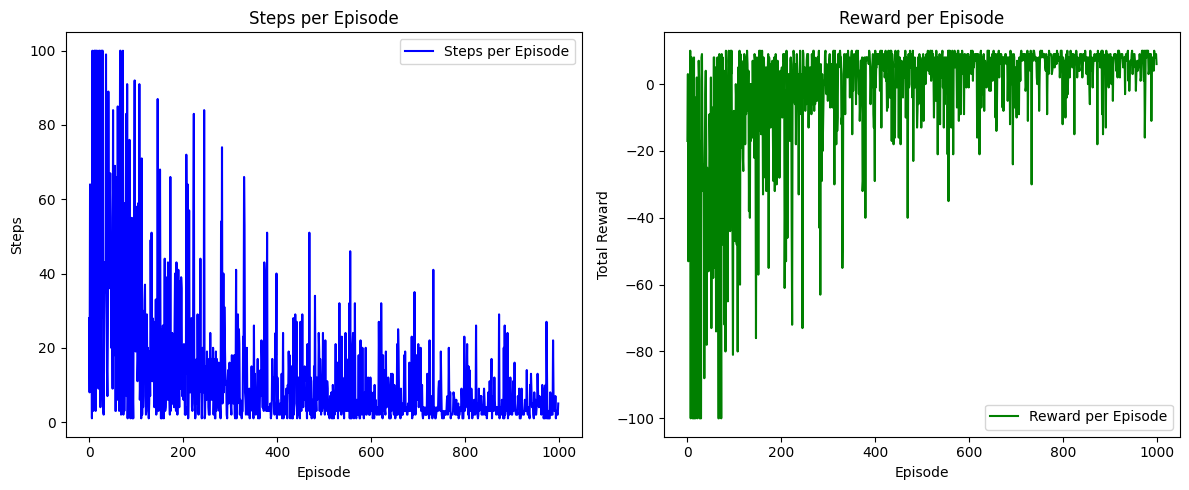

In [75]:
# Создаем среду и агента
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Обучаем агента
agent.train(episodes=1000)

# Визуализация обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()


# **Тестирование агента**

Success rate: 100.00%


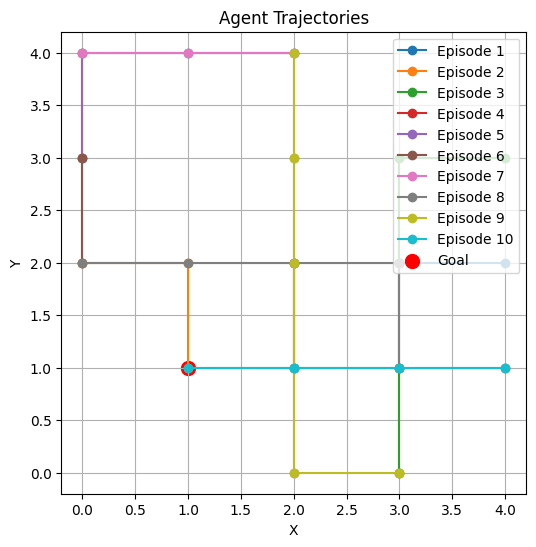

Learned Policy (Best Action per State-Goal Pair):
State ((0, 0), (0, 0)): Action 0
State ((0, 0), (0, 1)): Action 3
State ((0, 0), (0, 2)): Action 3
State ((0, 0), (0, 3)): Action 3
State ((0, 0), (0, 4)): Action 3
State ((0, 0), (1, 0)): Action 1
State ((0, 0), (1, 1)): Action 1
State ((0, 0), (1, 2)): Action 1
State ((0, 0), (1, 3)): Action 3
State ((0, 0), (1, 4)): Action 3
State ((0, 0), (2, 0)): Action 1
State ((0, 0), (2, 1)): Action 3
State ((0, 0), (2, 2)): Action 1
State ((0, 0), (2, 3)): Action 1
State ((0, 0), (2, 4)): Action 3
State ((0, 0), (3, 0)): Action 1
State ((0, 0), (3, 1)): Action 1
State ((0, 0), (3, 2)): Action 3
State ((0, 0), (3, 3)): Action 0
State ((0, 0), (3, 4)): Action 2
State ((0, 0), (4, 0)): Action 1
State ((0, 0), (4, 1)): Action 3
State ((0, 0), (4, 2)): Action 1
State ((0, 0), (4, 3)): Action 2
State ((0, 0), (4, 4)): Action 3
State ((0, 1), (0, 0)): Action 2
State ((0, 1), (0, 1)): Action 0
State ((0, 1), (0, 2)): Action 3
State ((0, 1), (0, 3)): Ac

In [63]:
# Тестирование стратегии и визуализация траекторий
success_count = 0
trajectories = []

for episode in range(10):  # Тестируем на 10 эпизодах
    (agent_pos, goal_pos) = env.reset()  # Сбрасываем среду с новой целью
    state = (agent_pos, goal_pos)
    trajectory = [agent_pos]
    done = False
    steps = 0

    while not done and steps < 30:  # Лимит шагов
        action = np.argmax([agent.get_q_value(state, a) for a in range(4)])  # Лучшее действие
        next_state, _, done = env.step(action)
        trajectory.append(next_state[0])  # Позиция агента
        state = next_state
        steps += 1

    trajectories.append(trajectory)
    if done:
        success_count += 1

print(f"Success rate: {success_count / 10 * 100:.2f}%")

# Визуализация траекторий
plt.figure(figsize=(6, 6))
for idx, trajectory in enumerate(trajectories):
    x, y = zip(*trajectory)
    plt.plot(y, x, marker='o', label=f"Episode {idx+1}")
plt.scatter(goal_pos[1], goal_pos[0], c='red', label='Goal', s=100)  # Цель
plt.title("Agent Trajectories")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

print("Learned Policy (Best Action per State-Goal Pair):")
for agent_x in range(env.size):
    for agent_y in range(env.size):
        for goal_x in range(env.size):
            for goal_y in range(env.size):
                state = ((agent_x, agent_y), (goal_x, goal_y))
                action = np.argmax([agent.get_q_value(state, a) for a in range(4)])
                print(f"State {state}: Action {action}")


# **Тест для множества эпизодов с разными конечными целями - тренировка 1000 эпизодов**

In [76]:
num_episodes = 1000
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")

Episode 0: Trajectory - [(0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3)], Target - (4, 1)
Episode 1: Trajectory - [(0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3)], Target - (4, 3)
Episode 2: Trajectory - [(0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3)], Target - (4, 0)
Episode 3: Trajectory - [(1, 1), (0, 1)], Target - (0, 1)
Episode 4: Trajectory - [(0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2)], Target - (4, 0)
Episode 5: Trajectory - [(0, 3)], Target - (0, 3)
Episode 6: Trajectory - [(0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 2), (0, 2)], Target - (4, 0)
Episode 7: Trajectory - [(3, 2), (3, 1)], Target - (3, 1)
Episode 8: Trajectory - [(3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4), (3, 4)], Target - (2, 0)
Episode 9: Trajectory - [(1, 3), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1)], Target - (4, 1)
Episode 10: Trajectory - [(1, 4), (0, 4), (0, 4), (0, 4), (0

# **Обучение и его визуализация - 2000 эпизодов**

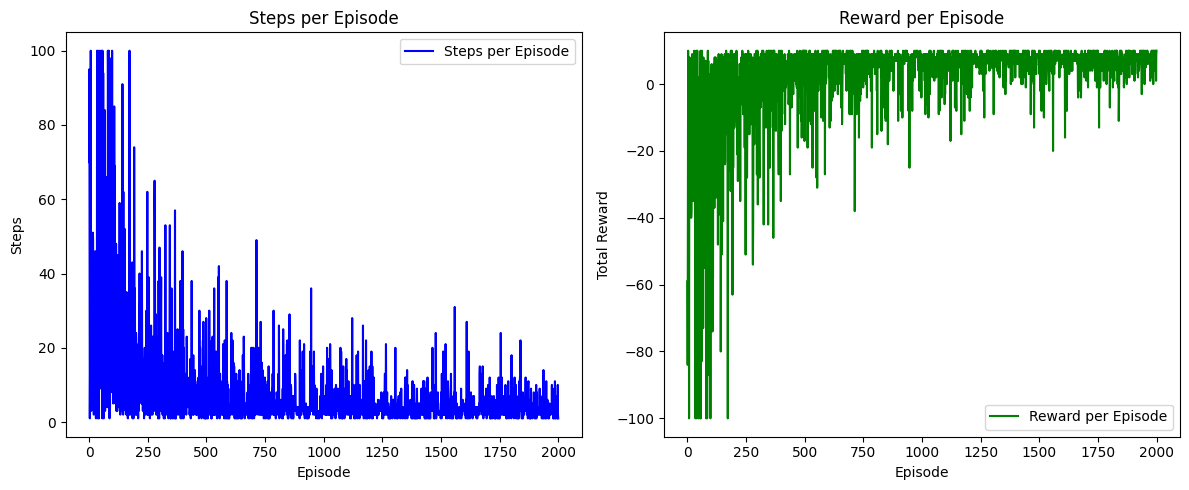

In [77]:
# Создаем среду и агента
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Обучаем агента
agent.train(episodes=2000)

# Визуализация обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()

# **Тест для множества эпизодов с разными конечными целями - тренировка 2000 эпизодов**

In [78]:
num_episodes = 1000
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")

Episode 0: Trajectory - [(3, 2), (4, 2), (4, 1)], Target - (4, 1)
Episode 1: Trajectory - [(1, 0)], Target - (1, 0)
Episode 2: Trajectory - [(1, 1), (2, 1), (2, 2), (2, 3)], Target - (2, 3)
Episode 3: Trajectory - [(4, 3), (3, 3)], Target - (3, 3)
Episode 4: Trajectory - [(1, 3), (1, 2), (1, 1)], Target - (1, 1)
Episode 5: Trajectory - [(2, 2), (2, 1), (2, 0), (1, 0), (0, 0)], Target - (0, 0)
Episode 6: Trajectory - [(1, 2), (1, 3), (0, 3)], Target - (0, 3)
Episode 7: Trajectory - [(0, 0), (1, 0)], Target - (1, 0)
Episode 8: Trajectory - [(2, 2), (3, 2), (4, 2), (4, 3), (4, 4)], Target - (4, 4)
Episode 9: Trajectory - [(0, 1)], Target - (0, 1)
Episode 10: Trajectory - [(1, 3), (1, 2), (1, 1), (1, 0)], Target - (1, 0)
Episode 11: Trajectory - [(3, 1), (3, 0), (2, 0), (1, 0)], Target - (1, 0)
Episode 12: Trajectory - [(1, 4), (0, 4)], Target - (0, 4)
Episode 13: Trajectory - [(2, 3)], Target - (2, 3)
Episode 14: Trajectory - [(0, 1), (0, 2), (0, 3)], Target - (0, 3)
Episode 15: Trajector

# **Обучение и его визуализация - 3000 эпизодов**

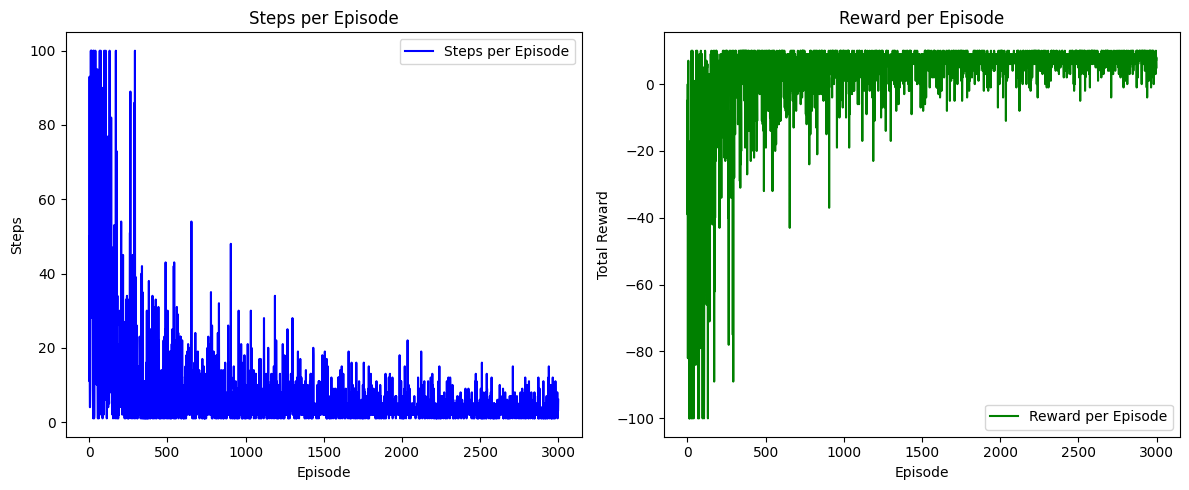

In [79]:
# Создаем среду и агента
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Обучаем агента
agent.train(episodes=3000)

# Визуализация обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()

# **Тест для множества эпизодов с разными конечными целями - тренировка 3000 эпизодов**

In [80]:
num_episodes = 1000
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")

Episode 0: Trajectory - [(1, 3), (1, 2), (1, 1)], Target - (1, 1)
Episode 1: Trajectory - [(2, 2), (2, 1), (2, 0), (1, 0), (0, 0)], Target - (0, 0)
Episode 2: Trajectory - [(1, 4), (1, 3), (1, 2), (1, 1)], Target - (1, 1)
Episode 3: Trajectory - [(2, 3), (1, 3), (0, 3), (0, 2)], Target - (0, 2)
Episode 4: Trajectory - [(2, 2), (2, 1), (2, 0)], Target - (2, 0)
Episode 5: Trajectory - [(2, 2), (1, 2)], Target - (1, 2)
Episode 6: Trajectory - [(3, 3), (2, 3), (2, 4), (1, 4)], Target - (1, 4)
Episode 7: Trajectory - [(3, 2), (3, 3), (3, 4), (4, 4)], Target - (4, 4)
Episode 8: Trajectory - [(3, 3), (3, 2), (2, 2)], Target - (2, 2)
Episode 9: Trajectory - [(2, 3), (3, 3), (4, 3)], Target - (4, 3)
Episode 10: Trajectory - [(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)], Target - (3, 4)
Episode 11: Trajectory - [(1, 3), (2, 3), (3, 3)], Target - (3, 3)
Episode 12: Trajectory - [(2, 1), (2, 2), (2, 3), (1, 3)], Target - (1, 3)
Episode 13: Trajectory - [(0, 0), (0, 1), (

# **Обучение и его визуализация - 4000 эпизодов**

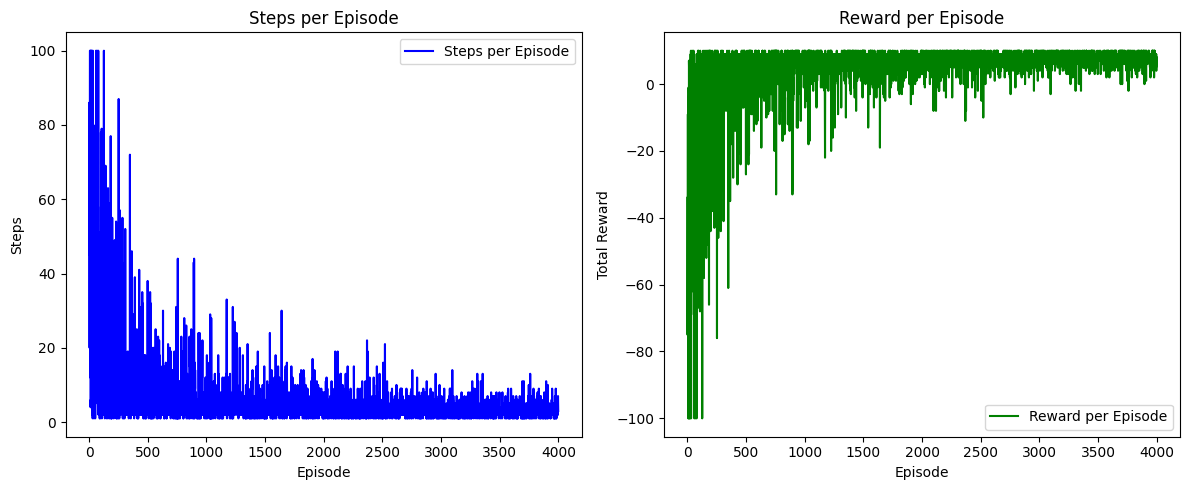

In [81]:
# Создаем среду и агента
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Обучаем агента
agent.train(episodes=4000)

# Визуализация обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()

# **Тест для множества эпизодов с разными конечными целями - тренировка 4000 эпизодов**

In [82]:
num_episodes = 1000
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")

Episode 0: Trajectory - [(3, 2)], Target - (3, 2)
Episode 1: Trajectory - [(3, 2), (3, 1)], Target - (3, 1)
Episode 2: Trajectory - [(3, 2), (3, 3), (2, 3), (1, 3), (0, 3)], Target - (0, 3)
Episode 3: Trajectory - [(2, 4), (2, 3)], Target - (2, 3)
Episode 4: Trajectory - [(1, 1), (1, 2)], Target - (1, 2)
Episode 5: Trajectory - [(2, 3), (1, 3), (0, 3), (0, 4)], Target - (0, 4)
Episode 6: Trajectory - [(3, 0), (3, 1), (2, 1), (1, 1), (0, 1)], Target - (0, 1)
Episode 7: Trajectory - [(3, 4)], Target - (3, 4)
Episode 8: Trajectory - [(4, 3), (4, 2), (4, 1), (4, 0)], Target - (4, 0)
Episode 9: Trajectory - [(1, 2), (1, 1), (1, 0), (2, 0), (3, 0)], Target - (3, 0)
Episode 10: Trajectory - [(1, 1)], Target - (1, 1)
Episode 11: Trajectory - [(3, 2), (3, 1), (2, 1), (2, 0), (1, 0)], Target - (1, 0)
Episode 12: Trajectory - [(1, 1), (1, 2), (2, 2), (3, 2), (4, 2)], Target - (4, 2)
Episode 13: Trajectory - [(3, 1), (2, 1), (1, 1), (0, 1)], Target - (0, 1)
Episode 14: Trajectory - [(2, 2), (2, 1)

# **Обучение и его визуализация - 5000 эпизодов**

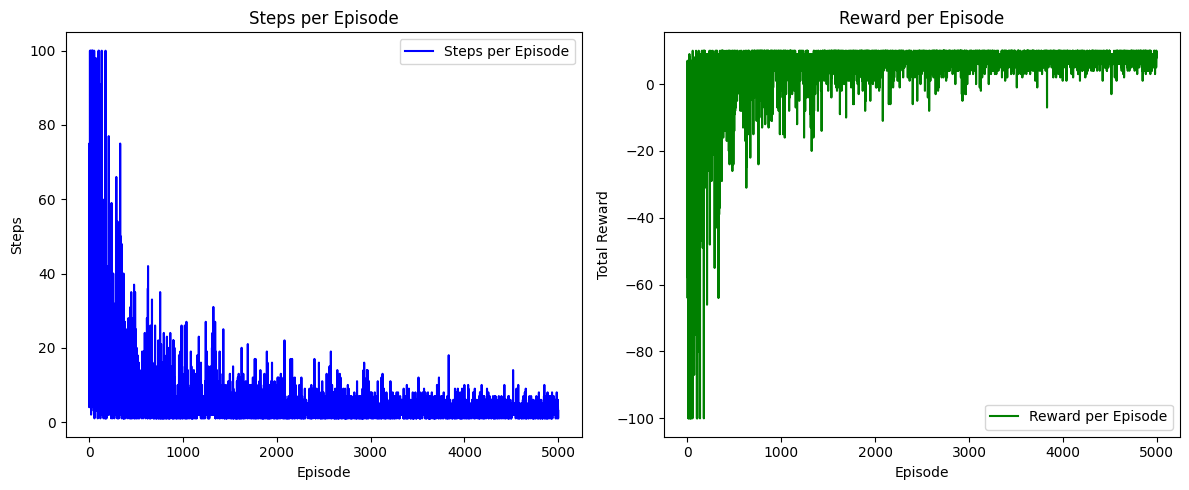

In [83]:
# Создаем среду и агента
env = GridEnvironment(size=5)
agent = QLearningAgent(env)

# Обучаем агента
agent.train(episodes=5000)

# Визуализация обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agent.steps_per_episode, label="Steps per Episode", color='blue')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(agent.rewards_per_episode, label="Reward per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode")
plt.legend()

plt.tight_layout()
plt.show()

# **Тест для множества эпизодов с разными конечными целями - тренировка 5000 эпизодов**

In [84]:
num_episodes = 1000
max_steps = 9
success = 0
for episode in range(num_episodes):
    (agent_pos, goal_pos) = env.reset()
    trajectory = []
    state = (agent_pos, goal_pos)
    for step in range(max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        trajectory.append(next_state[0])  # Append agent's position only
        if done:
            break
        state = next_state
    if trajectory[-1] == goal_pos:
      success += 1
    print(f"Episode {episode}: Trajectory - {trajectory}, Target - {goal_pos}")

print(f"Total success: {success}/{num_episodes}, {success / num_episodes * 100:.2f}%")

Episode 0: Trajectory - [(3, 0), (2, 0)], Target - (2, 0)
Episode 1: Trajectory - [(3, 2), (2, 2), (1, 2), (1, 1)], Target - (1, 1)
Episode 2: Trajectory - [(4, 3), (3, 3), (3, 2)], Target - (3, 2)
Episode 3: Trajectory - [(3, 2), (3, 3), (3, 4)], Target - (3, 4)
Episode 4: Trajectory - [(0, 2), (0, 3)], Target - (0, 3)
Episode 5: Trajectory - [(2, 4), (2, 3), (2, 2)], Target - (2, 2)
Episode 6: Trajectory - [(4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0)], Target - (0, 4)
Episode 7: Trajectory - [(2, 3), (2, 2), (1, 2)], Target - (1, 2)
Episode 8: Trajectory - [(3, 1), (2, 1), (1, 1), (0, 1)], Target - (0, 1)
Episode 9: Trajectory - [(2, 1), (3, 1)], Target - (3, 1)
Episode 10: Trajectory - [(3, 2), (2, 2), (1, 2), (1, 1)], Target - (1, 1)
Episode 11: Trajectory - [(2, 2), (2, 3), (2, 4), (1, 4), (0, 4)], Target - (0, 4)
Episode 12: Trajectory - [(2, 3), (3, 3)], Target - (3, 3)
Episode 13: Trajectory - [(2, 3), (2, 2), (1, 2), (1, 1)], Target - (1, 1)
Episode 